# Stock Market Analysis


We'll be answering the following questions along the way:

* 1.) What was the change in price of the stock over time?
* 2.) What was the daily return of the stock on average?
* 3.) What was the moving average of the various stocks?
* 4.) What was the correlation between different stocks' closing prices?
* 4.) What was the correlation between different stocks' daily returns?
* 5.) How much value do we put at risk by investing in a particular stock?
* 6.) How can we attempt to predict future stock behavior?

## Import Libraries

In [1]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader import data, wb

# For time stamps
from datetime import datetime

# For division
from __future__ import division

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Read Data

In [3]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# setup start and end time
end = datetime.now()
# set the start day for one year previous
start = datetime(end.year - 1, end.month, end.day)

#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = data.DataReader(stock,'yahoo',start,end)

In [4]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-29,90.542503,87.820000,88.312500,90.445000,130646000.0,89.839653
2020-06-30,91.495003,90.000000,90.019997,91.199997,140223200.0,90.589600
2020-07-01,91.839996,90.977501,91.279999,91.027496,110737200.0,90.418251
2020-07-02,92.617500,90.910004,91.962502,91.027496,114041600.0,90.418251
2020-07-06,93.945000,92.467499,92.500000,93.462502,118655600.0,92.836960


In [5]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,122.808467,119.748625,121.381136,121.305328,1.208333e+08,120.934328
std,11.485126,11.394038,11.555440,11.421797,5.294623e+07,11.546230
min,90.542503,87.820000,88.312500,90.445000,4.669130e+07,89.839653
25%,116.965000,113.945000,115.550003,115.450001,8.619195e+07,114.888390
50%,124.849998,121.519997,123.400002,123.080002,1.062438e+08,122.791428
75%,130.945000,128.004997,129.195000,129.725006,1.451250e+08,129.580002
max,145.089996,141.369995,143.600006,143.160004,3.743368e+08,142.704010


In [6]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2020-06-29 to 2021-06-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       251 non-null    float64
 1   Low        251 non-null    float64
 2   Open       251 non-null    float64
 3   Close      251 non-null    float64
 4   Volume     251 non-null    float64
 5   Adj Close  251 non-null    float64
dtypes: float64(6)
memory usage: 13.7 KB


## EDA

### See How the Adj Close is Changing Along the Year

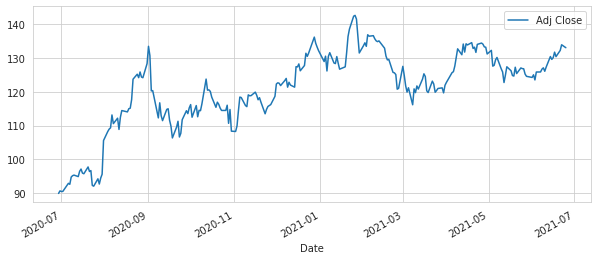

In [7]:
AAPL['Adj Close'].plot(legend = True, figsize = (10, 4))

### See How the Volume is Changing Along the Year

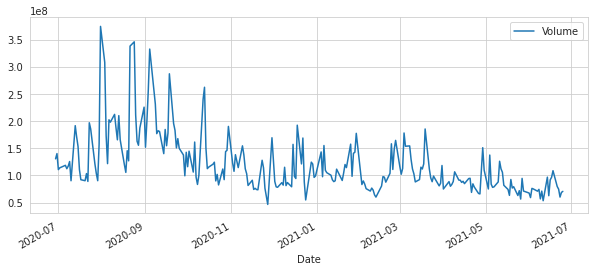

In [8]:
AAPL['Volume'].plot(legend = True, figsize = (10, 4))

### Moving Average
For more info on the moving average check out the following links:

1.) http://www.investopedia.com/terms/m/movingaverage.asp

2.) http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

In [13]:
# calculate moving average for 10, 20, 50 days
#ma_day = [10, 20, 50]

for ma in ma_day:
  column_name = "MA for %s days" %(str(ma))
  # calculate the mean moving average
  AAPL[column_name] = AAPL['Adj Close'].rolling(window = 3).mean()

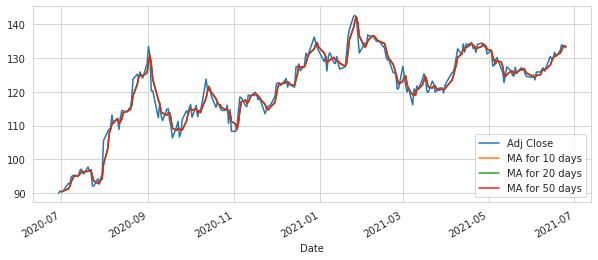

In [14]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

### Daily Returns

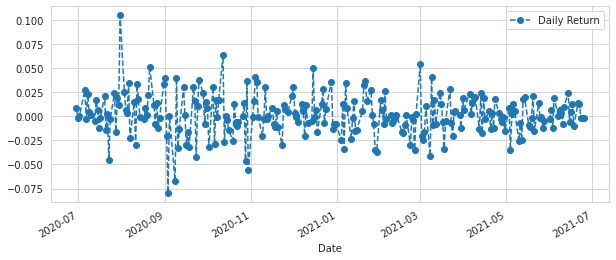

In [15]:
# new col daily return which is the %change in Adj Close
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize = (10, 4), legend = True, linestyle = '--', marker = 'o')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


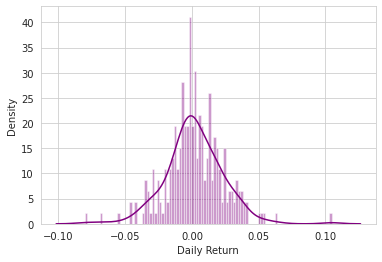

In [17]:
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, color = 'purple')

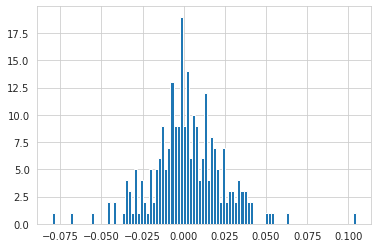

In [19]:
AAPL['Daily Return'].hist(bins = 100)

### Compare Adj Close Prices for All Stocks

In [21]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = data.DataReader(tech_list, 'yahoo', start, end)['Adj Close']

In [22]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-06-29,89.839653,1394.969971,196.537018,2680.379883
2020-06-30,90.589600,1413.609985,201.558395,2758.820068
2020-07-01,90.418251,1438.040039,202.736984,2878.699951
2020-07-02,90.418251,1464.699951,204.282013,2890.300049
2020-07-06,92.836960,1495.699951,208.679443,3057.040039


In [23]:
# Daily % return
tech_rets = closing_df.pct_change()

In [24]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-06-29,NaN,NaN,NaN,NaN
2020-06-30,0.008348,0.013362,0.025549,0.029265
2020-07-01,-0.001891,0.017282,0.005847,0.043453
2020-07-02,0.000000,0.018539,0.007621,0.004030
2020-07-06,0.026750,0.021165,0.021526,0.057690


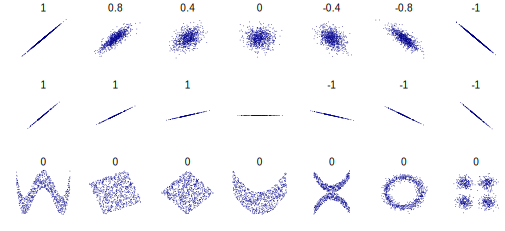

In [29]:
# personr correlated plots
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


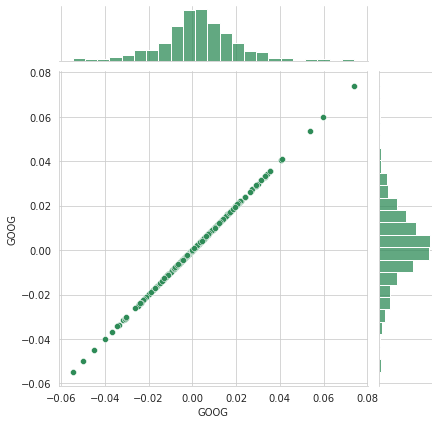

In [28]:
plot = sns.jointplot('GOOG', 'GOOG', tech_rets, kind = 'scatter', color = 'seagreen')

Since we are comparing Google to itself, the correlation must be linear with pearsonr = 1

### Compare Different Stokcs

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


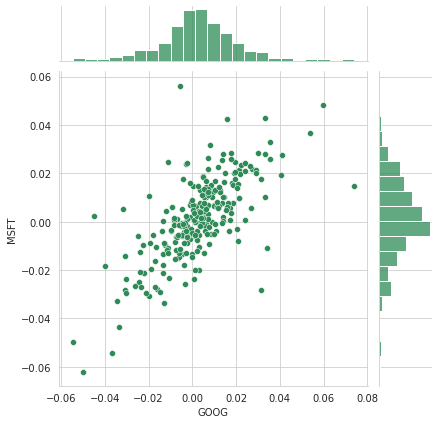

In [26]:
# compare Google with Microsoft
sns.jointplot('GOOG', 'MSFT', tech_rets, kind = 'scatter', color = 'seagreen')

### Relation Between Different Stocks

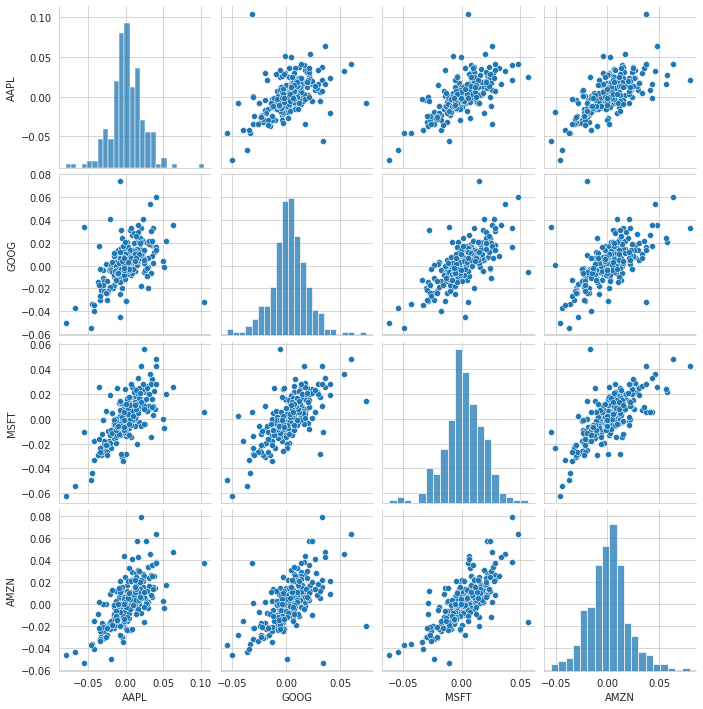

In [30]:
sns.pairplot(tech_rets.dropna())

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

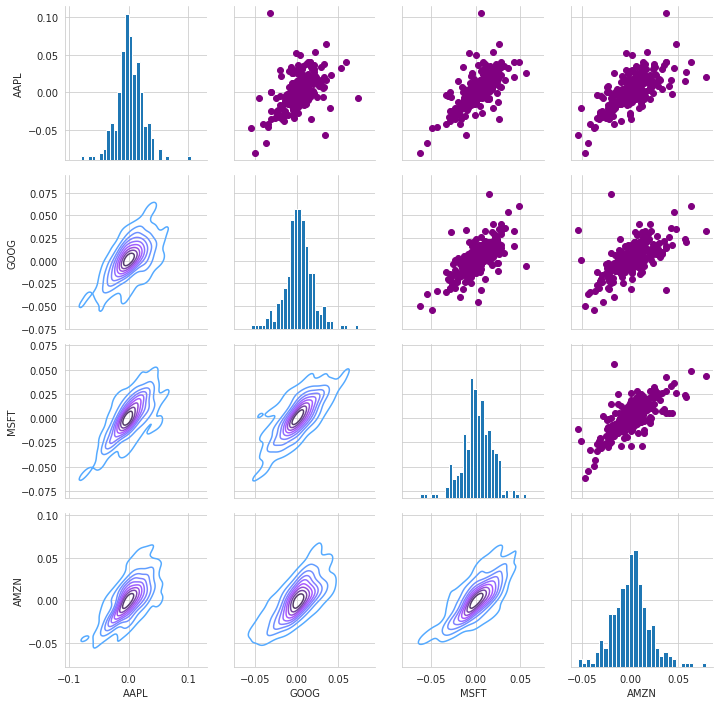

In [32]:
# PairGrid figure
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

We could have also analyzed the correlation of the closing prices using this exact same technique. Here it is shown, the code repeated from above with the exception of the DataFrame called.

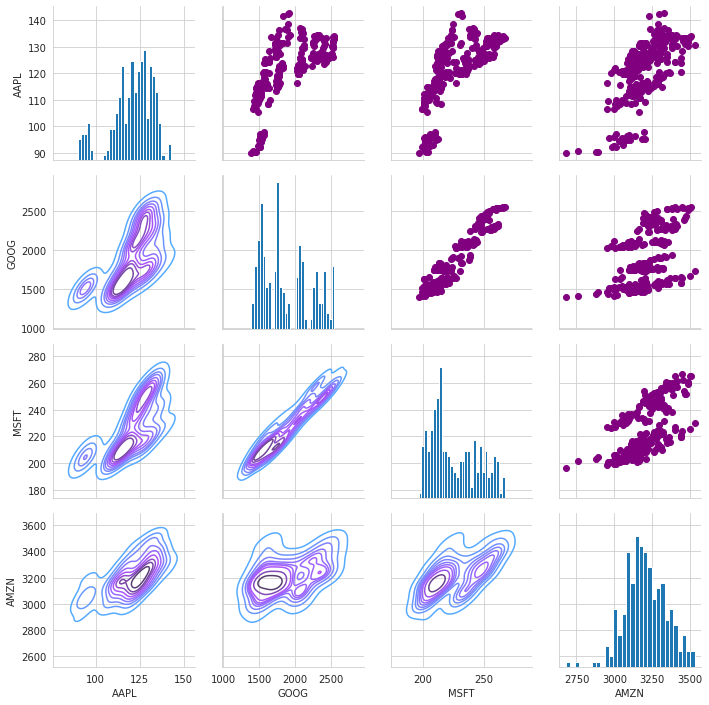

In [33]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)

### Feature Correlation Matrix

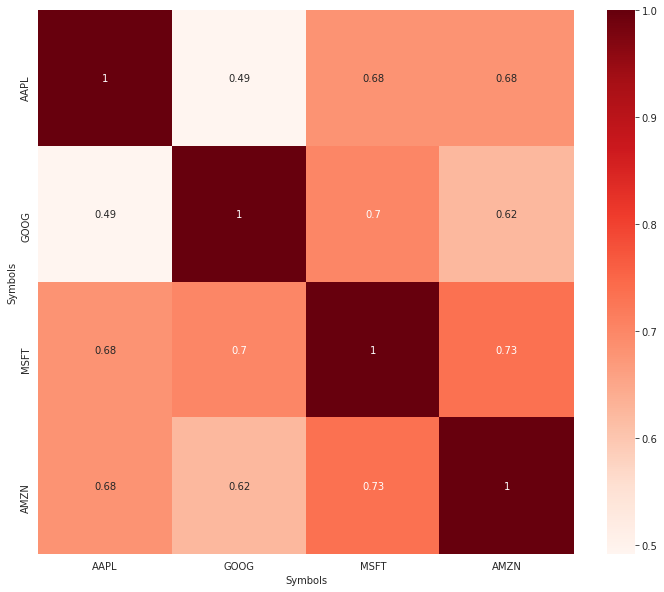

In [41]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
# Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = tech_rets.dropna().corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## Risk Analysis

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

In [42]:
# initialize a new dataframe
rets = tech_rets.dropna()

### Scatter Plot

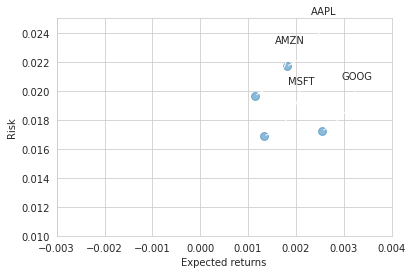

In [45]:
# area of circle
area = np.pi * 20

# scatter
plt.scatter(rets.mean(), rets.std(), alpha = 0.5, s = area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

### Value at Risk using the "Bootstrap" Method
For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

Let's go ahead and repeat the daily returns histogram for Apple stock.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


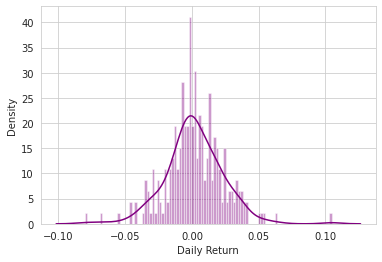

In [46]:
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, color = 'purple')

In [47]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-06-30,0.008348,0.013362,0.025549,0.029265
2020-07-01,-0.001891,0.017282,0.005847,0.043453
2020-07-02,0.000000,0.018539,0.007621,0.004030
2020-07-06,0.026750,0.021165,0.021526,0.057690
2020-07-07,-0.003103,-0.007033,-0.011628,-0.018619


In [48]:
rets['AAPL'].quantile(0.05)

-0.03320440656297106

This means that 95% of the times, our worst daily loss wont excced 3.32%

The 0.05 empirical quantile of daily returns is at -0.033. That means that with 95% confidence, our worst daily loss will not exceed 3.3%.

## Model Training and Evaluation

Reference: https://towardsdatascience.com/predicting-apple-stock-prices-with-neural-networks-4aefdf10afd0

### Read Data

We will read the data again to avoid any modifcations that we did previosuly while EDA

In [69]:
# setup start and end time
end = datetime.now()
# set the start day for one year previous
start = datetime(end.year - 1, end.month, end.day)
# data
aapl = data.DataReader('AAPL', 'yahoo', start, end)

### Data Preprocessing

We need to format the data in a way that each input contains stock prices of a 90-day period (t-90 to t-1) and the target is the price at time t. We can use a basic for loop as follows:

In [70]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-29,90.542503,87.820000,88.312500,90.445000,130646000.0,89.839653
2020-06-30,91.495003,90.000000,90.019997,91.199997,140223200.0,90.589600
2020-07-01,91.839996,90.977501,91.279999,91.027496,110737200.0,90.418251
2020-07-02,92.617500,90.910004,91.962502,91.027496,114041600.0,90.418251
2020-07-06,93.945000,92.467499,92.500000,93.462502,118655600.0,92.836960


In [71]:
hist = []
target = []
length = 90
adj_close = aapl['Adj Close']
for i in range(len(adj_close) - length):
   x = adj_close[i:i+length]
   y = adj_close[i+length]
   hist.append(x)
   target.append(y)

Each element of “hist” is a list of 90 items. Since we increment by one, the last item of the second element of “hist” must be equal to the first element of “target”. Let’s confirm:

In [72]:
hist[1][89] == target[0]
True

True

“Hist” and “target” are lists. We need to convert them to numpy arrays and reshape the target variable to a 2-dimensional array.

In [73]:
hist = np.array(hist)
target = np.array(target)
target = target.reshape(-1,1)

print(hist.shape)
print(target.shape)

(1168, 90) 
(1168, 1)

(161, 90)
(161, 1)


(1168, 1)

### Data Split


We split the data in a way that the model is trained with the data of 1138 days and tested on the data of the following 30 days.

In [83]:
hist.shape

(161, 90)

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(hist, target, test_size=0.33, random_state=42)

In [85]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(107, 90)
(54, 90)
(107, 1)
(54, 1)


### Data Normalization and Scaling

We can now do the normalization. We will first create a MinMaxScaler object and apply fit_transform method on training set. Then, we will only apply transform method on test set. It is very important to make this separation. Otherwise, we would be leaking information to the model from test set.

In [86]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

#train set, fit_transform
X_train_scaled = sc.fit_transform(X_train)
y_train_scaled = sc.fit_transform(y_train)

#test set, only transform
X_test_scaled = sc.transform(X_test)
y_test_scaled = sc.transform(y_test)

Last step of data preprocessing is to convert inputs to 3-D arrays because LSTM accepts 3-D arrays as input.

In [87]:
X_train_scaled = X_train_scaled.reshape((len(X_train_scaled), length, 1))
X_test_scaled = X_test_scaled.reshape((len(X_test_scaled), length, 1))

### Model Architecture

In [88]:
import tensorflow as tf
from tensorflow.keras import layers

We will create a sequential model with 4 LSTM layers and a dense layer.

In [89]:
model = tf.keras.Sequential()

model.add(layers.LSTM(units=64, return_sequences=True, input_shape=(90,1), dropout=0.2))
model.add(layers.LSTM(units=32, return_sequences=True, dropout=0.2))
model.add(layers.LSTM(units=32, return_sequences=True, dropout=0.2))
model.add(layers.LSTM(units=16, dropout=0.2))
model.add(layers.Dense(units=1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 90, 64)            16896     
_________________________________________________________________
lstm_1 (LSTM)                (None, 90, 32)            12416     
_________________________________________________________________
lstm_2 (LSTM)                (None, 90, 32)            8320      
_________________________________________________________________
lstm_3 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 40,785
Trainable params: 40,785
Non-trainable params: 0
_________________________________________________________________


There are some important points to keep in mind:
* If an LSTM layer is followed by another LSTM layer, return_sequences parameter must be set as True.
* Input_shape parameter needs to specified only for first LSTM layer. For other layers, model figure out the input from the output of the previous layer.
* Input_shape parameter is a tuple that contains timesteps and input_dim. Batch_size is specified during training.
* Units parameter is the number of nodes used in a layer. There is not a strict rule to define optimum number of nodes.
* Dropout is used to prevent the model from overfitting.
* Units of dense layer should be 1 since it is used as the output layer.
We can now compile the model by specifying an optimizer and a loss function.

### Compile and Fit

In [90]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [94]:
history = model.fit(X_train_scaled, y_train_scaled, 
                    epochs=30, batch_size=64)

Epoch 1/30
2/2 [==============================] - 0s 120ms/step - loss: 0.0183
Epoch 2/30
2/2 [==============================] - 0s 118ms/step - loss: 0.0175
Epoch 3/30
2/2 [==============================] - 0s 122ms/step - loss: 0.0185
Epoch 4/30
2/2 [==============================] - 0s 117ms/step - loss: 0.0188
Epoch 5/30
2/2 [==============================] - 0s 114ms/step - loss: 0.0195
Epoch 6/30
2/2 [==============================] - 0s 116ms/step - loss: 0.0207
Epoch 7/30
2/2 [==============================] - 0s 107ms/step - loss: 0.0175
Epoch 8/30
2/2 [==============================] - 0s 118ms/step - loss: 0.0161
Epoch 9/30
2/2 [==============================] - 0s 112ms/step - loss: 0.0153
Epoch 10/30
2/2 [==============================] - 0s 111ms/step - loss: 0.0174
Epoch 11/30
2/2 [==============================] - 0s 115ms/step - loss: 0.0170
Epoch 12/30
2/2 [==============================] - 0s 113ms/step - loss: 0.0168
Epoch 13/30
2/2 [==============================] 

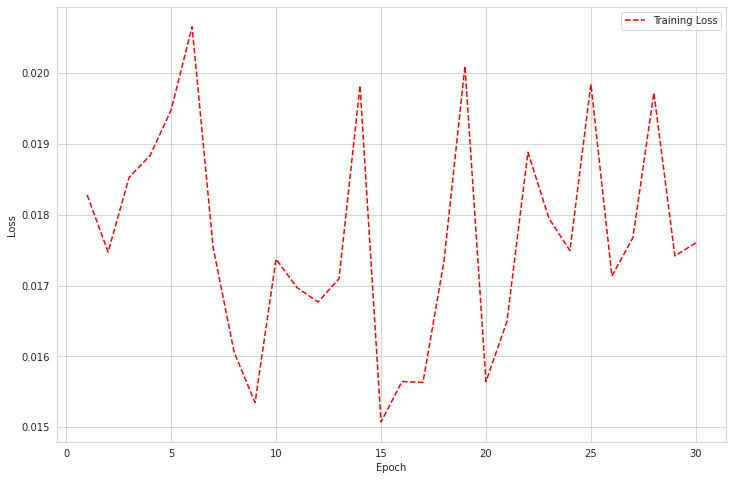

In [95]:
loss = history.history['loss']
epoch_count = range(1, len(loss) + 1)

plt.figure(figsize=(12,8))
plt.plot(epoch_count, loss, 'r--')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

### Evaluate

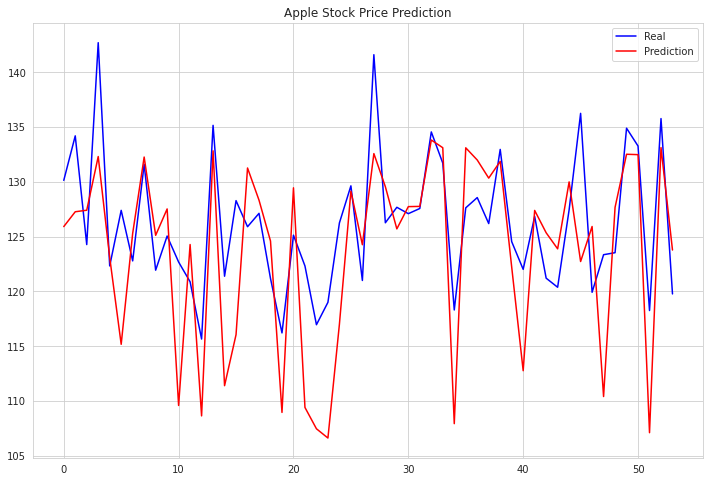

In [96]:
pred = model.predict(X_test_scaled)
pred_transformed = sc.inverse_transform(pred)

y_test_transformed = sc.inverse_transform(y_test_scaled)

plt.figure(figsize=(12,8))
plt.plot(y_test_transformed, color='blue', label='Real')
plt.plot(pred_transformed, color='red', label='Prediction')
plt.title('Apple Stock Price Prediction')
plt.legend()
plt.show()

Overall, model performance is good. As we can see the predictions are very close to the real values.